## Representacion del grafo

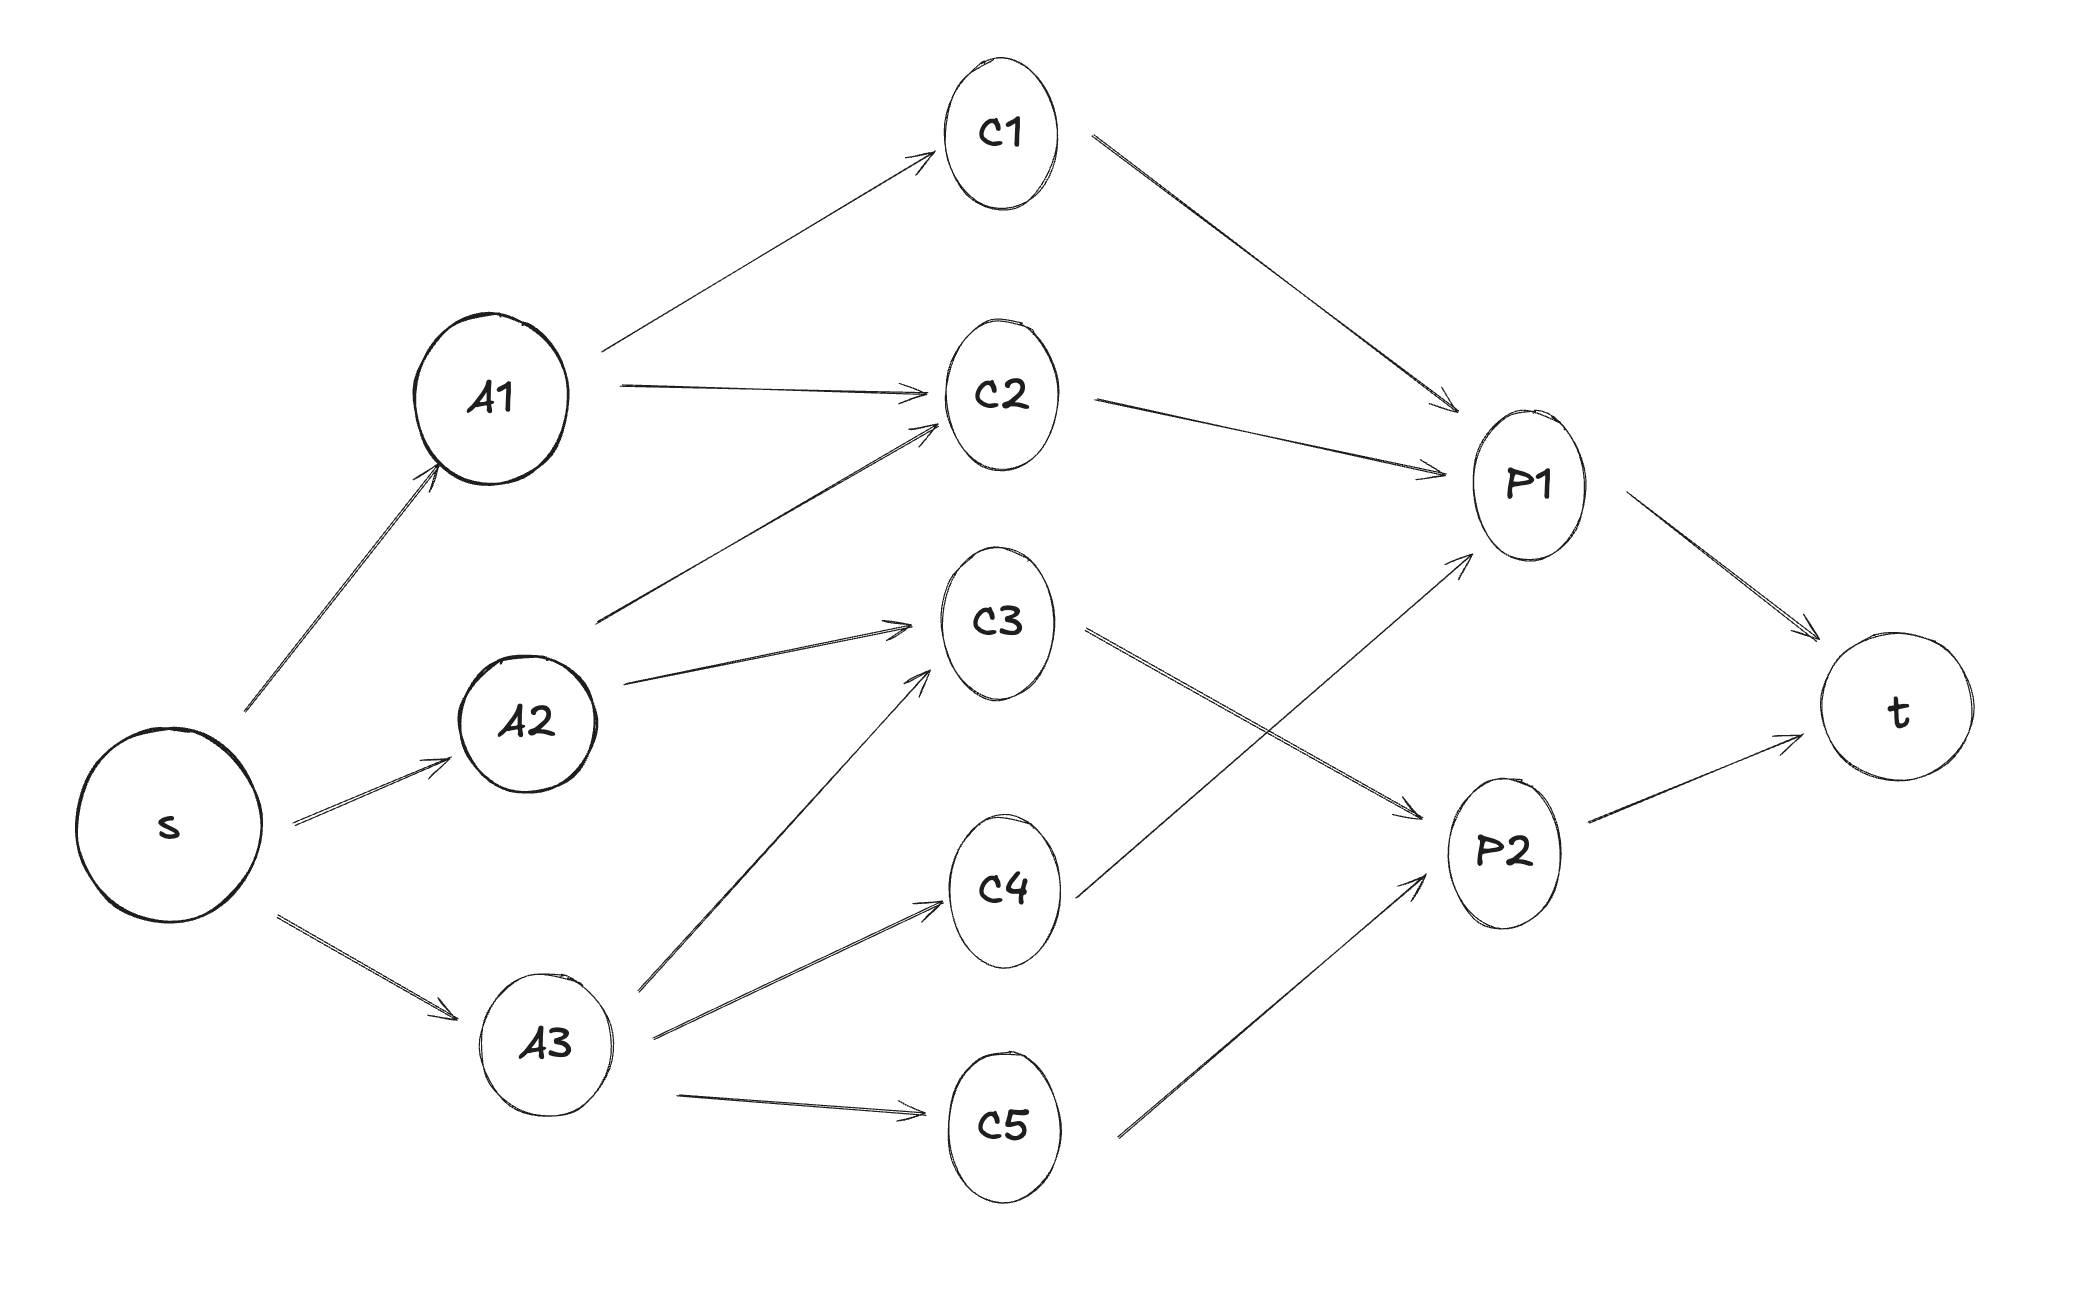

## Solucion Manual
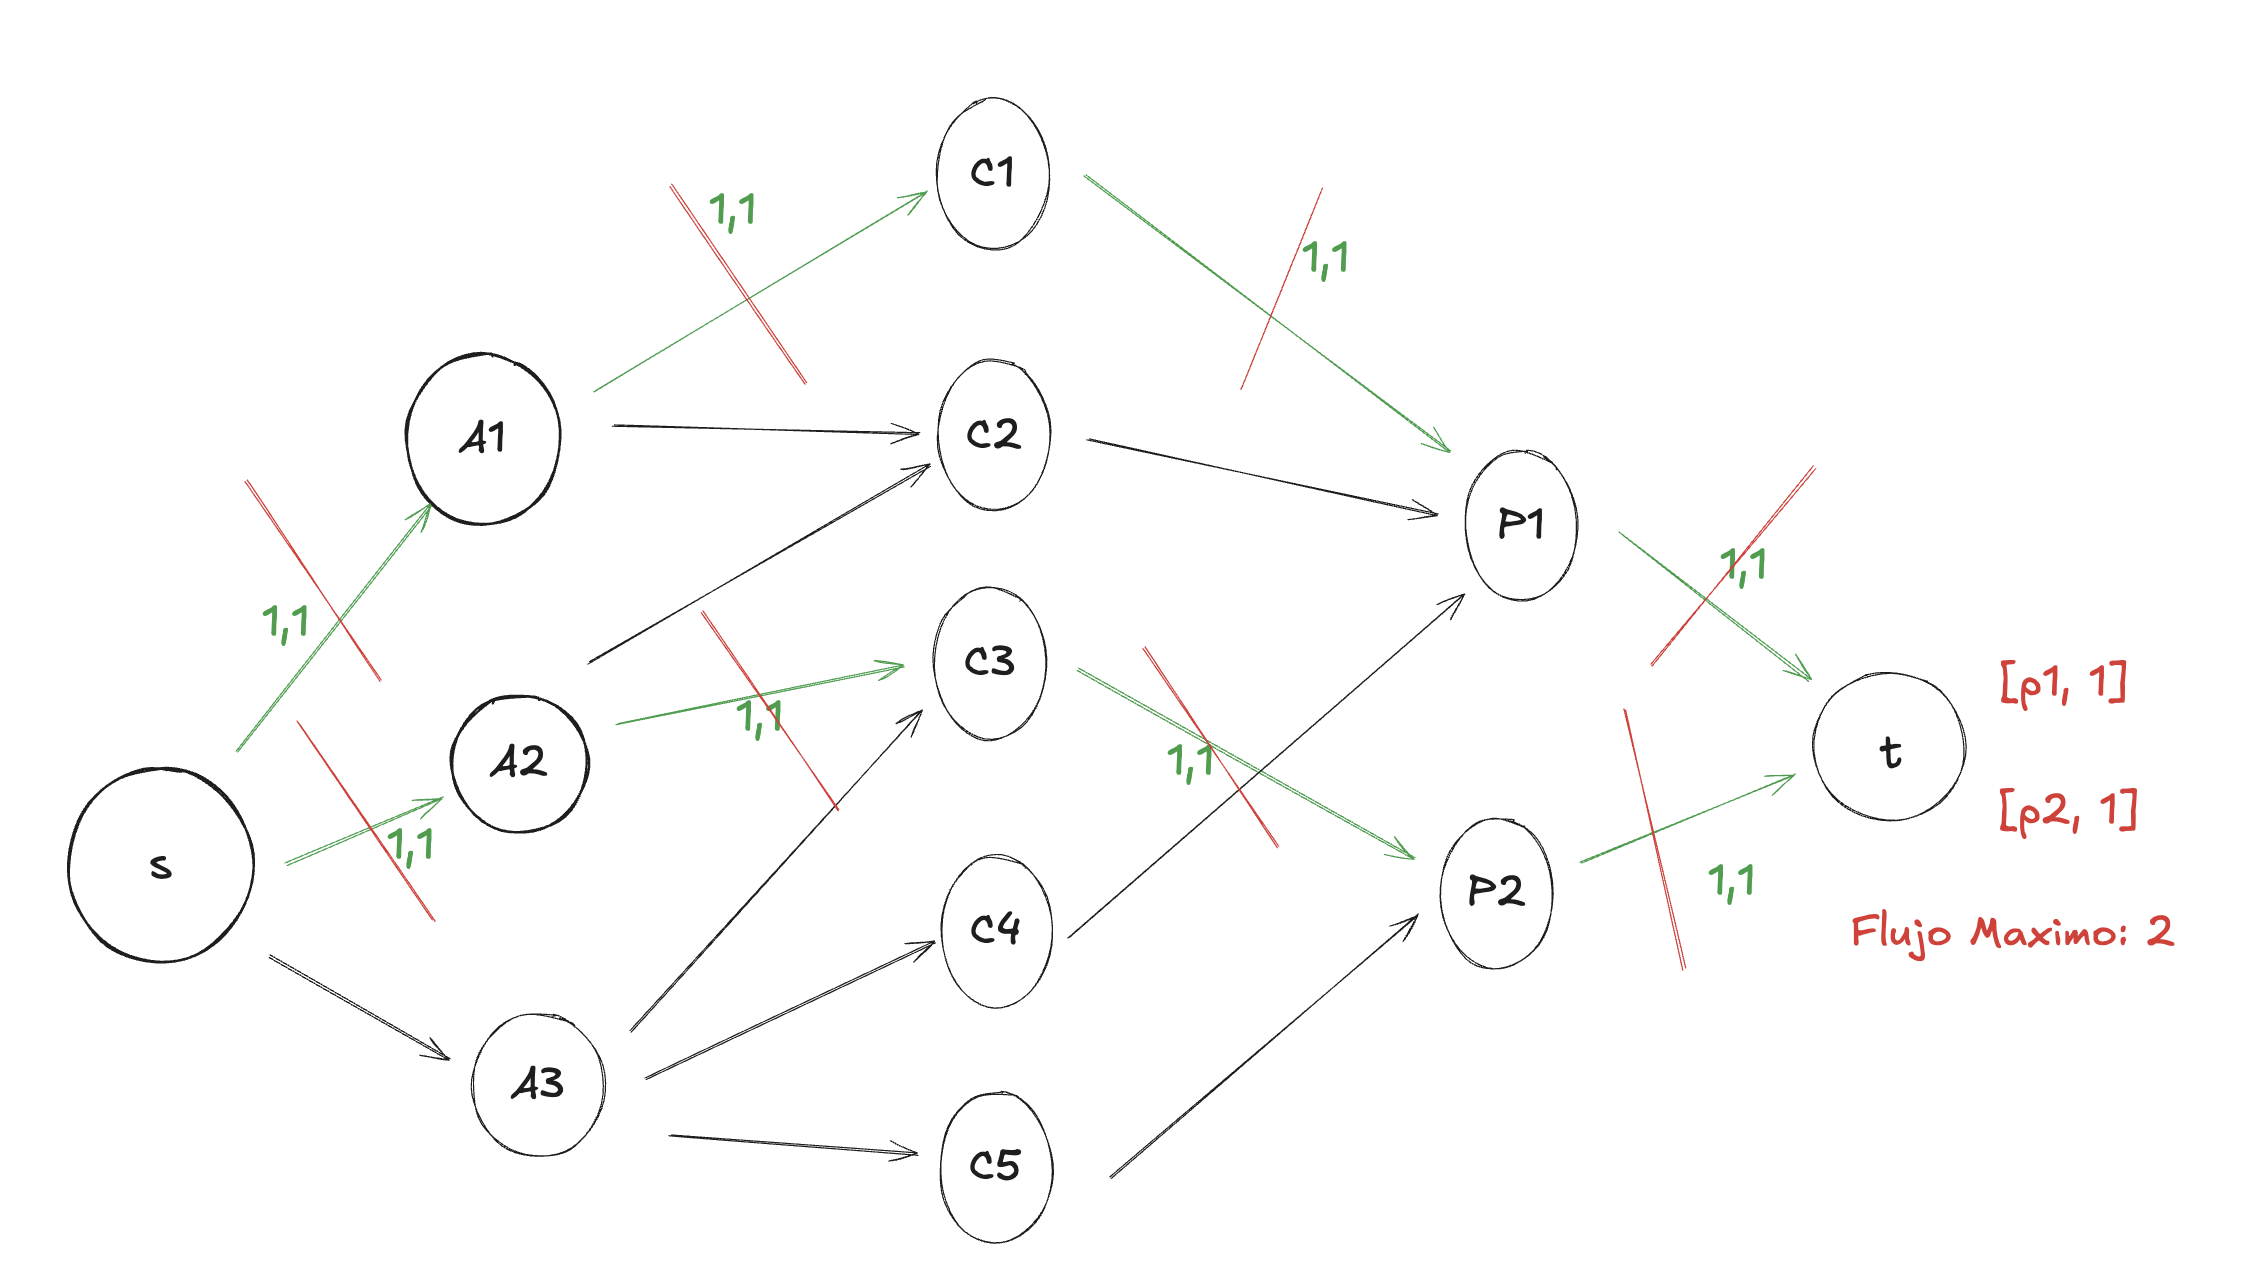

In [ ]:
def BFS(graph, s, t, parent):
    visited = [False] * len(graph)
    queue = []
    queue.append(s)
    visited[s] = True

    while queue:
        u = queue.pop(0)
        for ind in range(len(graph[u])):
            if visited[ind] is False and graph[u][ind] > 0:
                queue.append(ind)
                visited[ind] = True
                parent[ind] = u

    return True if visited[t] else False


def FordFulkerson(graph, source, sink):
    parent = [-1] * (len(graph))
    max_flow = 0
    paths = []  # Para almacenar los caminos encontrados

    original_graph = [row[:] for row in graph]

    while BFS(graph, source, sink, parent):
        path_flow = float("Inf")
        s = sink

        # Reconstuir camino
        path = []
        temp = sink
        while temp != -1:
            path.append(temp)
            temp = parent[temp]
        path.reverse()

        while s != source:
            path_flow = min(path_flow, graph[parent[s]][s])
            s = parent[s]

        max_flow += path_flow
        v = sink

        # Almacenar información del camino
        paths.append({
            'path': path,
            'flow': path_flow,
            'path_nodes': [node_names[i] for i in path]
        })

        while v != source:
            u = parent[v]
            graph[u][v] -= path_flow
            graph[v][u] += path_flow
            v = parent[v]

    return max_flow, paths

In [ ]:
# Nodos: S(0), A1(1), A2(2), A3(3), C1(4), C2(5), C3(6), C4(7), C5(8), P1(9), P2(10), T(11)

node_names = ['S', 'A1', 'A2', 'A3', 'C1', 'C2', 'C3', 'C4', 'C5', 'P1', 'P2', 'T']
node_indices = {name: i for i, name in enumerate(node_names)}

# Crear la matriz de adyacencia (12x12)
# 0=S, 1=A1, 2=A2, 3=A3, 4=C1, 5=C2, 6=C3, 7=C4, 8=C5, 9=P1, 10=P2, 11=T
graph = [
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # S  -> A1, A2, A3
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],  # A1 -> C1, C2
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],  # A2 -> C2, C3
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],  # A3 -> C3, C4, C5
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # C1 -> P1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # C2 -> P1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # C3 -> P2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # C4 -> P1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # C5 -> P2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # P1 -> T
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # P2 -> T
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   # T  -> (ninguno)
]

graph_copy = [row[:] for row in graph]

# Ejecutar Ford-Fulkerson
source = node_indices['S']  # 0
sink = node_indices['T']

max_flow, paths = FordFulkerson(graph_copy, source, sink)

print(f"Flujo máximo: {max_flow}")

Flujo máximo: 2


## Todos los caminos

In [ ]:
def analyze_results(max_flow, paths):
    print("RESULTADOS DEL ANÁLISIS:")
    print("=" * 50)

    print(f"\n🔹 FLUJO MÁXIMO: {max_flow}")
    print(f"🔹 NÚMERO DE ASOCIACIONES: 3")
    print(f"🔹 CONSEJO EQUILIBRADO: {'SÍ' if max_flow == 3 else 'NO'}")

    if max_flow == 3:
        print("🔹 EXPLICACIÓN: Todas las asociaciones pueden ser representadas")
    else:
        print("🔹 EXPLICACIÓN: No todas las asociaciones pueden ser representadas simultáneamente")
        print("🔹 LIMITANTE: Solo hay 2 partidos políticos para 3 asociaciones")

    print(f"\n🔹 CAMINOS DE FLUJO ENCONTRADOS ({len(paths)}):")
    for i, path_info in enumerate(paths, 1):
        path_str = " → ".join(path_info['path_nodes'])
        print(f"   Camino {i}: {path_str}")
        print(f"   Flujo: {path_info['flow']}")

        # Interpretar la representación
        if len(path_info['path_nodes']) >= 4:
            asociacion = path_info['path_nodes'][1]
            ciudadano = path_info['path_nodes'][2]
            partido = path_info['path_nodes'][3]
            print(f"   Representación: {asociacion} representada por {ciudadano} del {partido}")
        print()

def find_all_possible_paths():
    all_paths = []

    def dfs(current, path, visited):
        if current == node_indices['T']:
            all_paths.append(path[:])
            return

        for next_node in range(len(graph)):
            if graph[current][next_node] > 0 and next_node not in visited:
                visited.add(next_node)
                path.append(next_node)
                dfs(next_node, path, visited)
                path.pop()
                visited.remove(next_node)

    visited = {node_indices['S']}
    dfs(node_indices['S'], [node_indices['S']], visited)

    print("TODOS LOS CAMINOS POSIBLES:")
    print("=" * 50)
    for i, path in enumerate(all_paths, 1):
        path_names = [node_names[j] for j in path]
        path_str = " → ".join(path_names)
        print(f"Camino {i}: {path_str}")

        # Interpretar cada camino
        if len(path_names) >= 4:
            asociacion = path_names[1]
            ciudadano = path_names[2]
            partido = path_names[3]
            print(f"          {asociacion} representada por {ciudadano} del {partido}")

    print(f"\nTOTAL DE CAMINOS POSIBLES: {len(all_paths)}")
    return all_paths

In [ ]:
analyze_results(max_flow, paths)
all_paths = find_all_possible_paths()

RESULTADOS DEL ANÁLISIS:

🔹 FLUJO MÁXIMO: 2
🔹 NÚMERO DE ASOCIACIONES: 3
🔹 CONSEJO EQUILIBRADO: NO
🔹 EXPLICACIÓN: No todas las asociaciones pueden ser representadas simultáneamente
🔹 LIMITANTE: Solo hay 2 partidos políticos para 3 asociaciones

🔹 CAMINOS DE FLUJO ENCONTRADOS (2):
   Camino 1: S → A1 → C1 → P1 → T
   Flujo: 1
   Representación: A1 representada por C1 del P1

   Camino 2: S → A2 → C3 → P2 → T
   Flujo: 1
   Representación: A2 representada por C3 del P2

TODOS LOS CAMINOS POSIBLES:
Camino 1: S → A1 → C1 → P1 → T
          A1 representada por C1 del P1
Camino 2: S → A1 → C2 → P1 → T
          A1 representada por C2 del P1
Camino 3: S → A2 → C2 → P1 → T
          A2 representada por C2 del P1
Camino 4: S → A2 → C3 → P2 → T
          A2 representada por C3 del P2
Camino 5: S → A3 → C3 → P2 → T
          A3 representada por C3 del P2
Camino 6: S → A3 → C4 → P1 → T
          A3 representada por C4 del P1
Camino 7: S → A3 → C5 → P2 → T
          A3 representada por C5 del P2

TO

## Explicacion

Se trata de un problema de flujo máximo en una red donde necesitamos maximizar el número de asociaciones vecinales que pueden ser representadas por los partidos políticos a través de sus ciudadanos miembros.

Para hallar el flujo maximo de un grafo se utiliza el Algoritmo de Ford Fulkerson, para llegar de un destino s hasta un sumidero t.


En este caso, el destino sera uno ficticio 's' y el destino tambien lo será, agrupando el grafo como se ve en la representacion.

Asimismo, nos piden todos los caminos en el grafo hasta llegar al flujo maximo, por lo cual usare una lista dentro de la funcion ford fulkerson para almacenar ahi los datos por cada iteracion.